In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 


# plot
import os
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

# import warnings 
# warnings.filterwarnings('ignore')

print("imports sucessful")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


imports sucessful
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv("../input/titanic/train.csv")  #parch=number of parents on board, SibSp=nr of siblings on board  Emparked=where
test=pd.read_csv("../input/titanic/test.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_y=train.pop("Survived")
train
#test_y=test.pop("Survived") #has no survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
all_data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
len(all_data["Cabin"].unique())  #is this good enough? probl. not
all_data.pop("Cabin")

0        NaN
1        C85
2        NaN
3       C123
4        NaN
        ... 
1304     NaN
1305    C105
1306     NaN
1307     NaN
1308     NaN
Name: Cabin, Length: 1309, dtype: object

In [8]:
all_data['Fare']= all_data['Fare'].fillna(all_data['Fare'].median())

In [9]:
#dealing with NaN   from https://www.kaggle.com/alankritamishra/titaniceasyway
age_by_pclass_sex =all_data.groupby(['Sex', 'Pclass']).median()['Age']

all_data['Age']= all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
all_data['Age'].isnull().sum()

all_data['Family_size']= all_data['SibSp']+all_data['Parch']+1

all_data['Title'] = all_data['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0] #has gender in  it
#(good because we want it to count more, as it is very impactfull/correllating strongly(see heatmap below))
all_data['Title']
lbl= LabelEncoder()
lbl.fit(list(all_data['Title'].values)) 
all_data['Title'] = lbl.transform(list(all_data['Title'].values))


all_data['FarePerPerson']= all_data['Fare']/all_data['Family_size']  #we have fare twice, but that is ok/intended
all_data['FarePerPerson']

0         3.625000
1        35.641650
2         7.925000
3        26.550000
4         8.050000
           ...    
1304      8.050000
1305    108.900000
1306      7.250000
1307      8.050000
1308      7.452767
Name: FarePerPerson, Length: 1309, dtype: float64

In [10]:
trans = {"male": 0, "female": 1}
all_data['Sex']= all_data['Sex'].map(trans)

In [11]:
#objection! relevance!
all_data.pop('Ticket')  #drop()does not work
all_data.pop("Name")
all_data.pop("Embarked")
all_data.pop("PassengerId")
all_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Title,FarePerPerson
0,3,0,22.0,1,0,7.2500,2,12,3.62500
1,1,1,38.0,1,0,71.2833,2,13,35.64165
2,3,1,26.0,0,0,7.9250,1,9,7.92500
3,1,1,35.0,1,0,53.1000,2,13,26.55000
4,3,0,35.0,0,0,8.0500,1,12,8.05000


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         1309 non-null   int64  
 1   Sex            1309 non-null   int64  
 2   Age            1309 non-null   float64
 3   SibSp          1309 non-null   int64  
 4   Parch          1309 non-null   int64  
 5   Fare           1309 non-null   float64
 6   Family_size    1309 non-null   int64  
 7   Title          1309 non-null   int64  
 8   FarePerPerson  1309 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 92.2 KB


In [13]:
all_data.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Title,FarePerPerson
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.355997,29.261398,0.498854,0.385027,33.281086,1.883881,11.268908,20.513583
std,0.837836,0.478997,13.218275,1.041658,0.865560,51.741500,1.583639,1.833961,35.761052
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,9.000000,7.452767
50%,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000,12.000000,8.566667
75%,3.000000,1.000000,36.000000,1.000000,0.000000,31.275000,2.000000,12.000000,24.150000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,11.000000,17.000000,512.329200


# Ploting

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


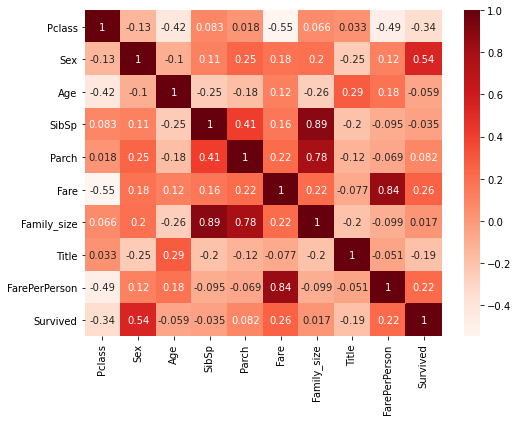

In [14]:
plotdata=all_data[:891]
plotdata["Survived"]=train_y
plt.figure(figsize=(8,6))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')

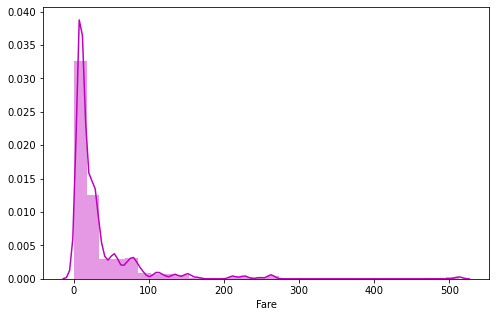

In [15]:
plt.figure(figsize=(8,5))
sns.distplot(plotdata['Fare'],bins=30,color='m')

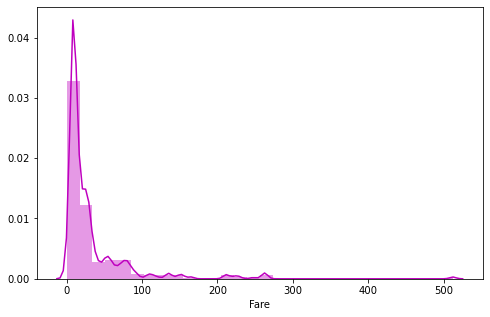

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(all_data['Fare'],bins=30,color='m')

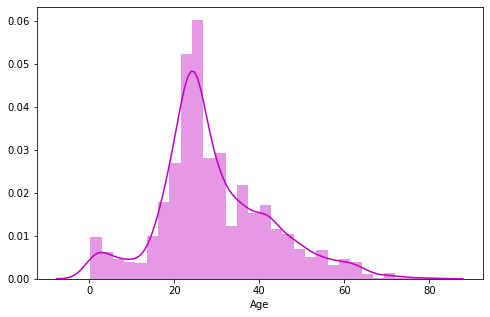

In [17]:
plt.figure(figsize=(8,5))  
sns.distplot(all_data['Age'],bins=30,color='m')

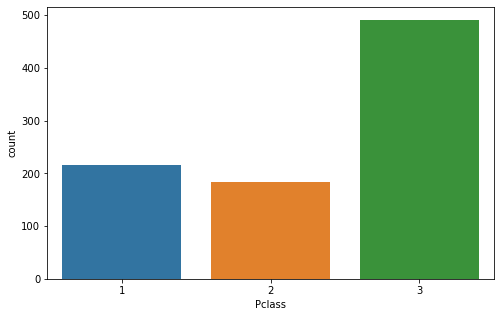

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('Pclass',data=plotdata)

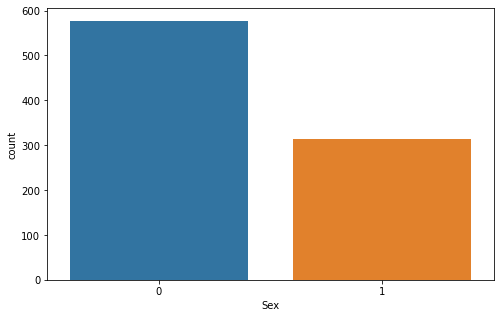

In [19]:
plt.figure(figsize=(8,5))
sns.countplot("Sex", data=plotdata) #0=male
#plt.legend(labels=("male","female"), loc='center left')

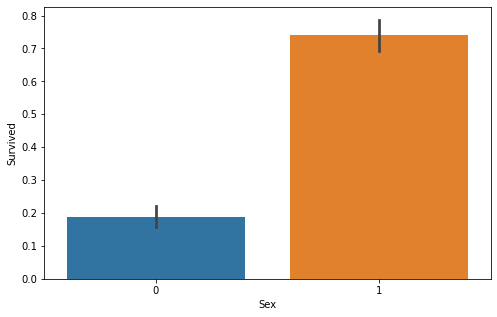

In [20]:
plt.figure(figsize=(8,5))
sns.barplot('Sex','Survived',data=plotdata)

In [21]:
# #family size might be overrepresented does not seem to help
# all_data.drop(["SibSp", "Parch"], axis=1,inplace=True)
# all_data["Gender"]=all_data["Sex"]# experimenting with overrepressenting sex

In [22]:
train=all_data[:891]
test=all_data[891:]

In [23]:
train

,Pclass,Sex,Age,SibSp,Parch,Fare,Family_size,Title,FarePerPerson
0,3,0,22.0,1,0,7.2500,2,12,3.62500
1,1,1,38.0,1,0,71.2833,2,13,35.64165
2,3,1,26.0,0,0,7.9250,1,9,7.92500
3,1,1,35.0,1,0,53.1000,2,13,26.55000
4,3,0,35.0,0,0,8.0500,1,12,8.05000
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,1,15,13.00000
887,1,1,19.0,0,0,30.0000,1,9,30.00000
888,3,1,22.0,1,2,23.4500,4,9,5.86250
889,1,0,26.0,0,0,30.0000,1,12,30.00000


# Models

In [24]:
modelForrest=RandomForestClassifier()# not regressor

In [25]:
#Hypertunning    from https://www.kaggle.com/harshkothari21/beginners-notebook-90-accuracy
n_estimators = [100,300, 500, 1000]
depth = [3,5,10,15]
min_split=[2,3,4]
min_leaf=[2,3,4]
bootstrap = ['True', 'False']
verbose = [5]

hyperparameter = {
    'n_estimators': n_estimators,
    'max_depth':depth,
    'bootstrap':bootstrap,
    'verbose':verbose,
    'min_samples_split':min_split,
    'min_samples_leaf':min_leaf
    }

OptForrest = RandomizedSearchCV(estimator=modelForrest,
                               param_distributions=hyperparameter,
                               cv=5, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = 4, 
                               return_train_score = True,
                               random_state=1)

In [26]:
OptForrest.fit(train,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': ['True', 'False'],
                                        'max_depth': [3, 5, 10, 15],
                                        'min_samples_leaf': [2, 3, 4],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [100, 300, 500, 1000],
                                        'verbose': [5]},
                   random_state=1, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [27]:
OptForrest.best_estimator_

RandomForestClassifier(bootstrap='False', max_depth=15, min_samples_leaf=3,
                       verbose=5)

In [28]:
#now use the parameters
modelForrest = RandomForestClassifier(bootstrap='False', 
                      max_depth=15, max_features='auto', 
                     min_samples_leaf=3,
                      n_estimators=100,
                      random_state=None, verbose=5)
# ccp_alpha=0.0, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0,
# min_impurity_split=None,  min_samples_split=4, min_weight_fraction_leaf=0.0, n_jobs=None, oob_score=False,, warm_start=False

In [29]:
modelForrest.fit(train,train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(bootstrap='False', max_depth=15, min_samples_leaf=3,
                       verbose=5)

In [30]:
acc_Forrest = round(modelForrest.score(train, train_y) * 100, 2)
print (acc_Forrest)

90.46


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


To high=> overfitting?

In [31]:
#gradientboost
modelboost=(GradientBoostingClassifier(learning_rate=0.05, n_estimators=300,min_samples_leaf=5))
modelboost.fit(train,train_y)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=5,
                           n_estimators=300)

In [32]:
#acc from https://www.kaggle.com/michaelabehsera/titanic-solution-a-beginner-s-guide
acc_Boost = round(modelboost.score(train, train_y) * 100, 2)
print (acc_Boost)

91.02


In [33]:
#xgboost

In [34]:
modelDec = DecisionTreeClassifier()
modelDec.fit(train, train_y)
acc_decision_tree = round(modelDec.score(train, train_y) * 100, 2)
print (acc_decision_tree)

98.43


In [35]:
modelLog = LogisticRegression()
modelLog.fit(train, train_y)
acc_log_reg = round( modelLog.score(train, train_y) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.92 percent


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNN worked poorly

In [36]:
# modelKNN3 =  KNeighborsClassifier(n_neighbors = 3)
# modelKNN3.fit(train, train_y)
# acc_KNN3 = round(modelKNN3.score(train, train_y) * 100, 2)
# print (acc_KNN3)

In [37]:
# modelKNN5 =  KNeighborsClassifier(n_neighbors = 5)  #3 or 5 doesen t seem to matter
# modelKNN5.fit(train, train_y)
# acc_KNN5 = round(modelKNN3.score(train, train_y) * 100, 2)
# print (acc_KNN5)

In [38]:
predictions=pd.DataFrame({'PassengerId': test.index+1,
                       'Survived': modelForrest.predict(test)})

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [39]:
predictions

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
predictions.to_csv("submit.csv", index=False)#